In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from librosa import cqt

os.chdir('..')
from music_transcription.onset_detection.read_data import read_X
from music_transcription.onset_detection.cnn_onset_detection import CnnOnsetDetector

Using Theano backend.


In [7]:
wavpath = r'data\recordings\mim-riff1-short-slow.wav'

## Current Spectrogram: FFT Sizes (4096, 2048, 1024)

In [8]:
onset_detector = CnnOnsetDetector.from_zip('models/onset_detection/20170511-3-channels_ds1-4_80-perc_adjusted-labels.zip')
sg = onset_detector.feature_extractor._read_and_extract([wavpath])
np.array(sg).shape

Reading wave files
Creating spectrograms


(3, 1993, 80)

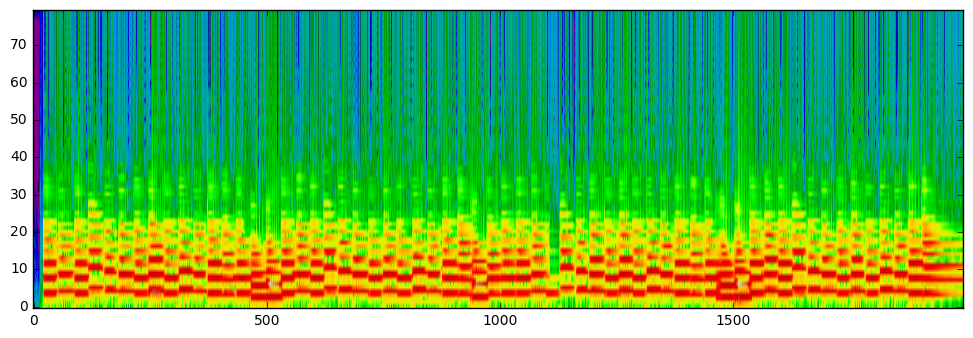

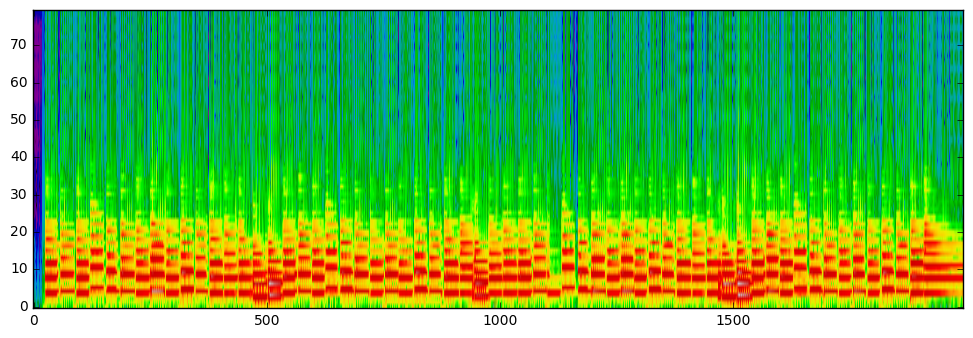

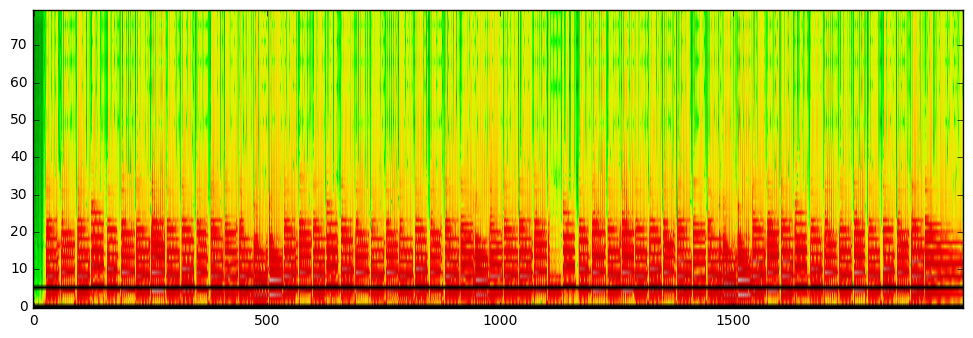

In [9]:
for spectrogram in sg:
    plt.figure(figsize=(12,6))
    plt.imshow(np.array(spectrogram).T, aspect=8, origin='lower', cmap=plt.cm.spectral)

## Constant Q Transform (CQT)

In [10]:
fr_hz = onset_detector.feature_extractor.frame_rate_hz
sr = onset_detector.feature_extractor.sample_rate
subs = onset_detector.feature_extractor.subsampling_step
samples, _ = read_X(wavpath, fr_hz, sr, subs)
print(samples.shape)
samples = samples.ravel()
print(samples.shape)

(2001, 441)
(882441,)


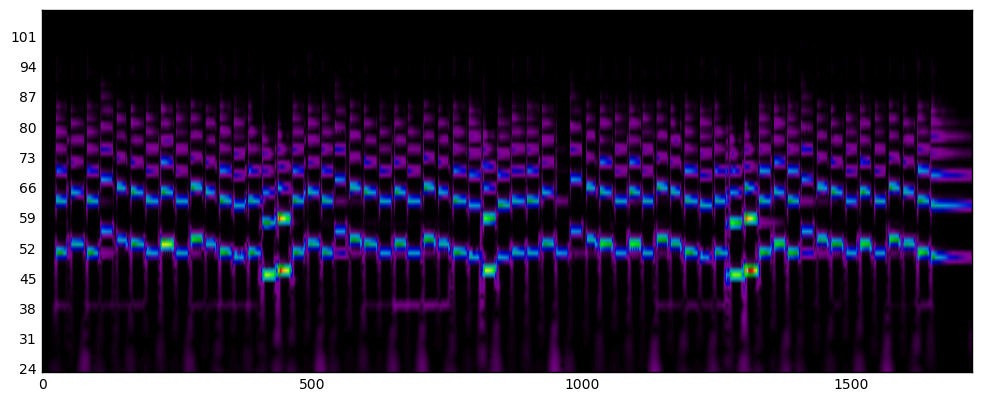

In [16]:
hopl = 512 # must be 2^n cannot be 441
cqt_spect = cqt(samples, sr=sr)
cqt_spect = np.abs(cqt_spect)  # convert from complex to real (uses "norm")

plt.figure(figsize=(12,6))
plt.imshow(cqt_spect, aspect=8, origin='lower', cmap=plt.cm.spectral)
yt = np.arange(0, cqt_spect.shape[0], 7)
_ = plt.yticks(yt, yt+24) # range of values in edges)

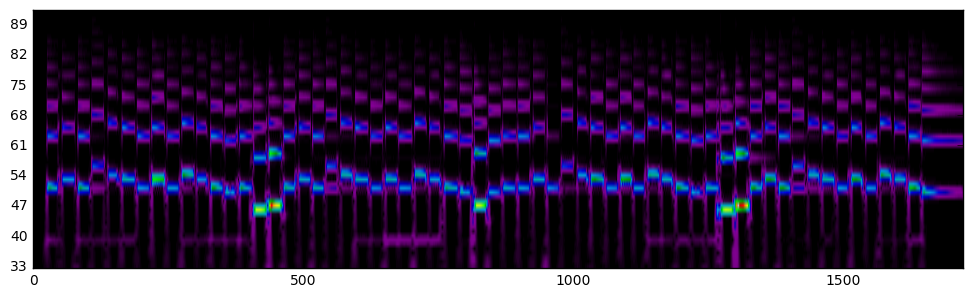

In [17]:
n_bins=60
lowfreq = 55.0 # A1 (midi 33) # gtr E 82.4068892282
# highfreq = lowfreq * 2**(n_bins/12)
cqt_spect = cqt(samples, sr=sr, hop_length=hopl, fmin=lowfreq, n_bins=n_bins,
        filter_scale=1, # Filter scale factor. Small values (<1) use shorter windows for improved time resolution.
        norm=1, # Type of norm to use for basis function normalization.
        sparsity=0.01, # Sparsify the CQT basis by discarding up to `sparsity` fraction of the energy in each basis. 0 = off
        window='hann',
        scale=False,  # True seems to amplify harmonic notes (octaves)
        pad_mode='reflect')
cqt_spect = np.abs(cqt_spect)  # convert from complex to real (uses "norm")

plt.figure(figsize=(12,6))
plt.imshow(cqt_spect, aspect=8, origin='lower', cmap=plt.cm.spectral)
yt = np.arange(0, cqt_spect.shape[0], 7)
_ = plt.yticks(yt, yt+33) # range of values in edges)

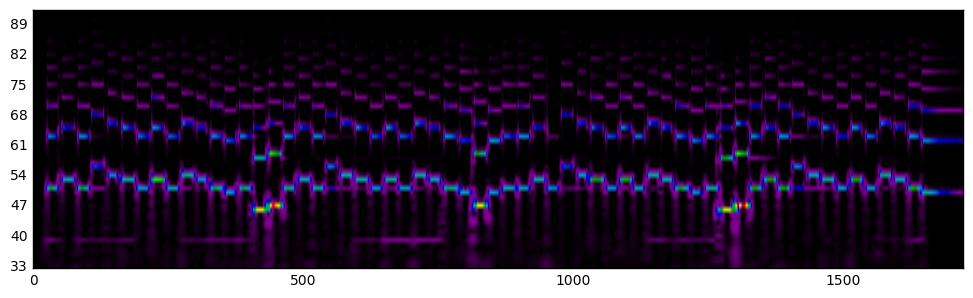

In [22]:
cqt_spect = cqt(samples, sr=sr, hop_length=hopl, fmin=lowfreq, n_bins=n_bins, scale=False, filter_scale=2)
cqt_spect = np.abs(cqt_spect)  # convert from complex to real (uses "norm")

plt.figure(figsize=(12,6))
plt.imshow(cqt_spect, aspect=8, origin='lower', cmap=plt.cm.spectral)
yt = np.arange(0, cqt_spect.shape[0], 7)
_ = plt.yticks(yt, yt+33) # range of values in edges)

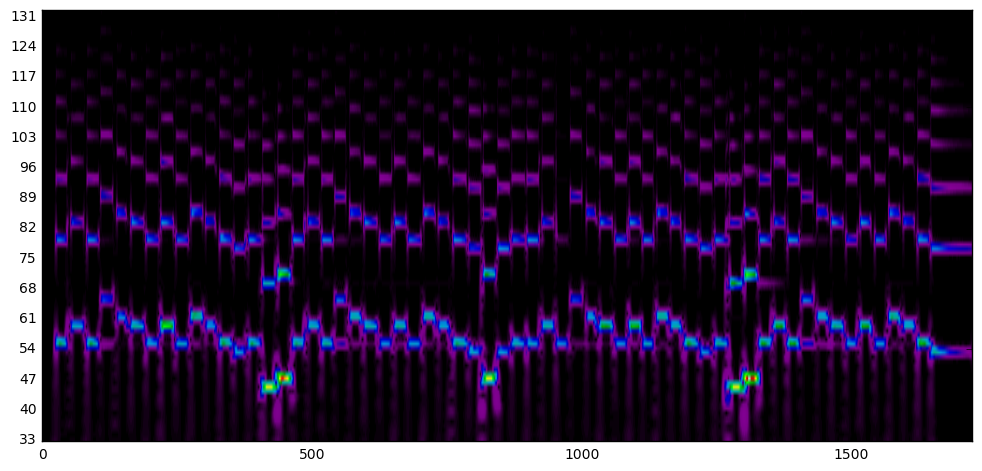

In [33]:
cqt_spect = cqt(samples, sr=sr, hop_length=hopl, fmin=82.4068892282, n_bins=100, bins_per_octave=24, scale=False)
cqt_spect = np.abs(cqt_spect)  # convert from complex to real (uses "norm")

plt.figure(figsize=(12,6))
plt.imshow(cqt_spect, aspect=8, origin='lower', cmap=plt.cm.spectral)
yt = np.arange(0, cqt_spect.shape[0], 7)
_ = plt.yticks(yt, yt+33) # range of values in edges)